## Using Machine Learning to Predict whether a NBA player will have a career more than 5 Years or Not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("nba_logreg.csv")

In [3]:
df

name  gp   min  pts  fgm  fga    fg  3p_made  3pa    3p  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  ...   

      fta    ft  oreb  dreb  reb  ast  stl  blk  tov  target_5yrs  
0     2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1     3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2     1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3     1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4     1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  
...   ...   ...   ...   ...  ...  ...  ...  ...  ...          ...  
1335  1.5  79.2   0.4   0.8  1.2  2.5  0.6  0.2  0.8          0.0  
1336  1.0  79.4   0.4   1.1  1.5  2.3  0.8  0.0  1.3          1.0  
1337  1.6  64.3   1.5   2.3  3.8  0.3  0.3  0.4  0.9          0.0  
1338  1.8  62.5   0.2   0.4  0.7  2.2  0.4  0.1  0.8          1.0  
1339  1.0  67.3   0.2   0.7  0.9  1.4  0.7  0.1  0.9          1.0  

[1340 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1329 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

In [6]:
df.describe()

gp          min          pts          fgm          fga  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     60.414179    17.624627     6.801493     2.629104     5.885299   
std      17.433992     8.307964     4.357545     1.683555     3.593488   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.875000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.550000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

                fg      3p_made          3pa           3p          ftm  \
count  1340.000000  1340.000000  1340.000000  1329.000000  1340.000000   
mean     44.169403     0.247612     0.779179    19.308126     1.297687   
std       6.137679     0.383688     1.061847    16.022916     0.987246   
min      23.800000     0.000000     0.000000     0.000000     0.000000   
25%      40.200000     0.000000     0.000000     0.000000     0.600000   
50%      44.100000     0.100000     0.300000    22.400000     1.000000   
75%      47.900000     0.400000     1.200000    32.500000     1.600000   
max      73.700000     2.300000     6.500000   100.000000     7.700000   

               fta           ft         oreb         dreb          reb  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean      1.821940    70.300299     1.009403     2.025746     3.034478   
std       1.322984    10.578479     0.777119     1.360008     2.057774   
min       0.000000     0.000000     0.000000     0.200000     0.300000   
25%       0.900000    64.700000     0.400000     1.000000     1.500000   
50%       1.500000    71.250000     0.800000     1.700000     2.500000   
75%       2.300000    77.600000     1.400000     2.600000     4.000000   
max      10.200000   100.000000     5.300000     9.600000    13.900000   

               ast          stl          blk          tov  target_5yrs  
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000  
mean      1.550522     0.618507     0.368582     1.193582     0.620149  
std       1.471169     0.409759     0.429049     0.722541     0.485531  
min       0.000000     0.000000     0.000000     0.100000     0.000000  
25%       0.600000     0.300000     0.100000     0.700000     0.000000  
50%       1.100000     0.500000     0.200000     1.000000     1.000000  
75%       2.000000     0.800000     0.500000     1.500000     1.000000  
max      10.600000     2.500000     3.900000     4.400000     1.000000

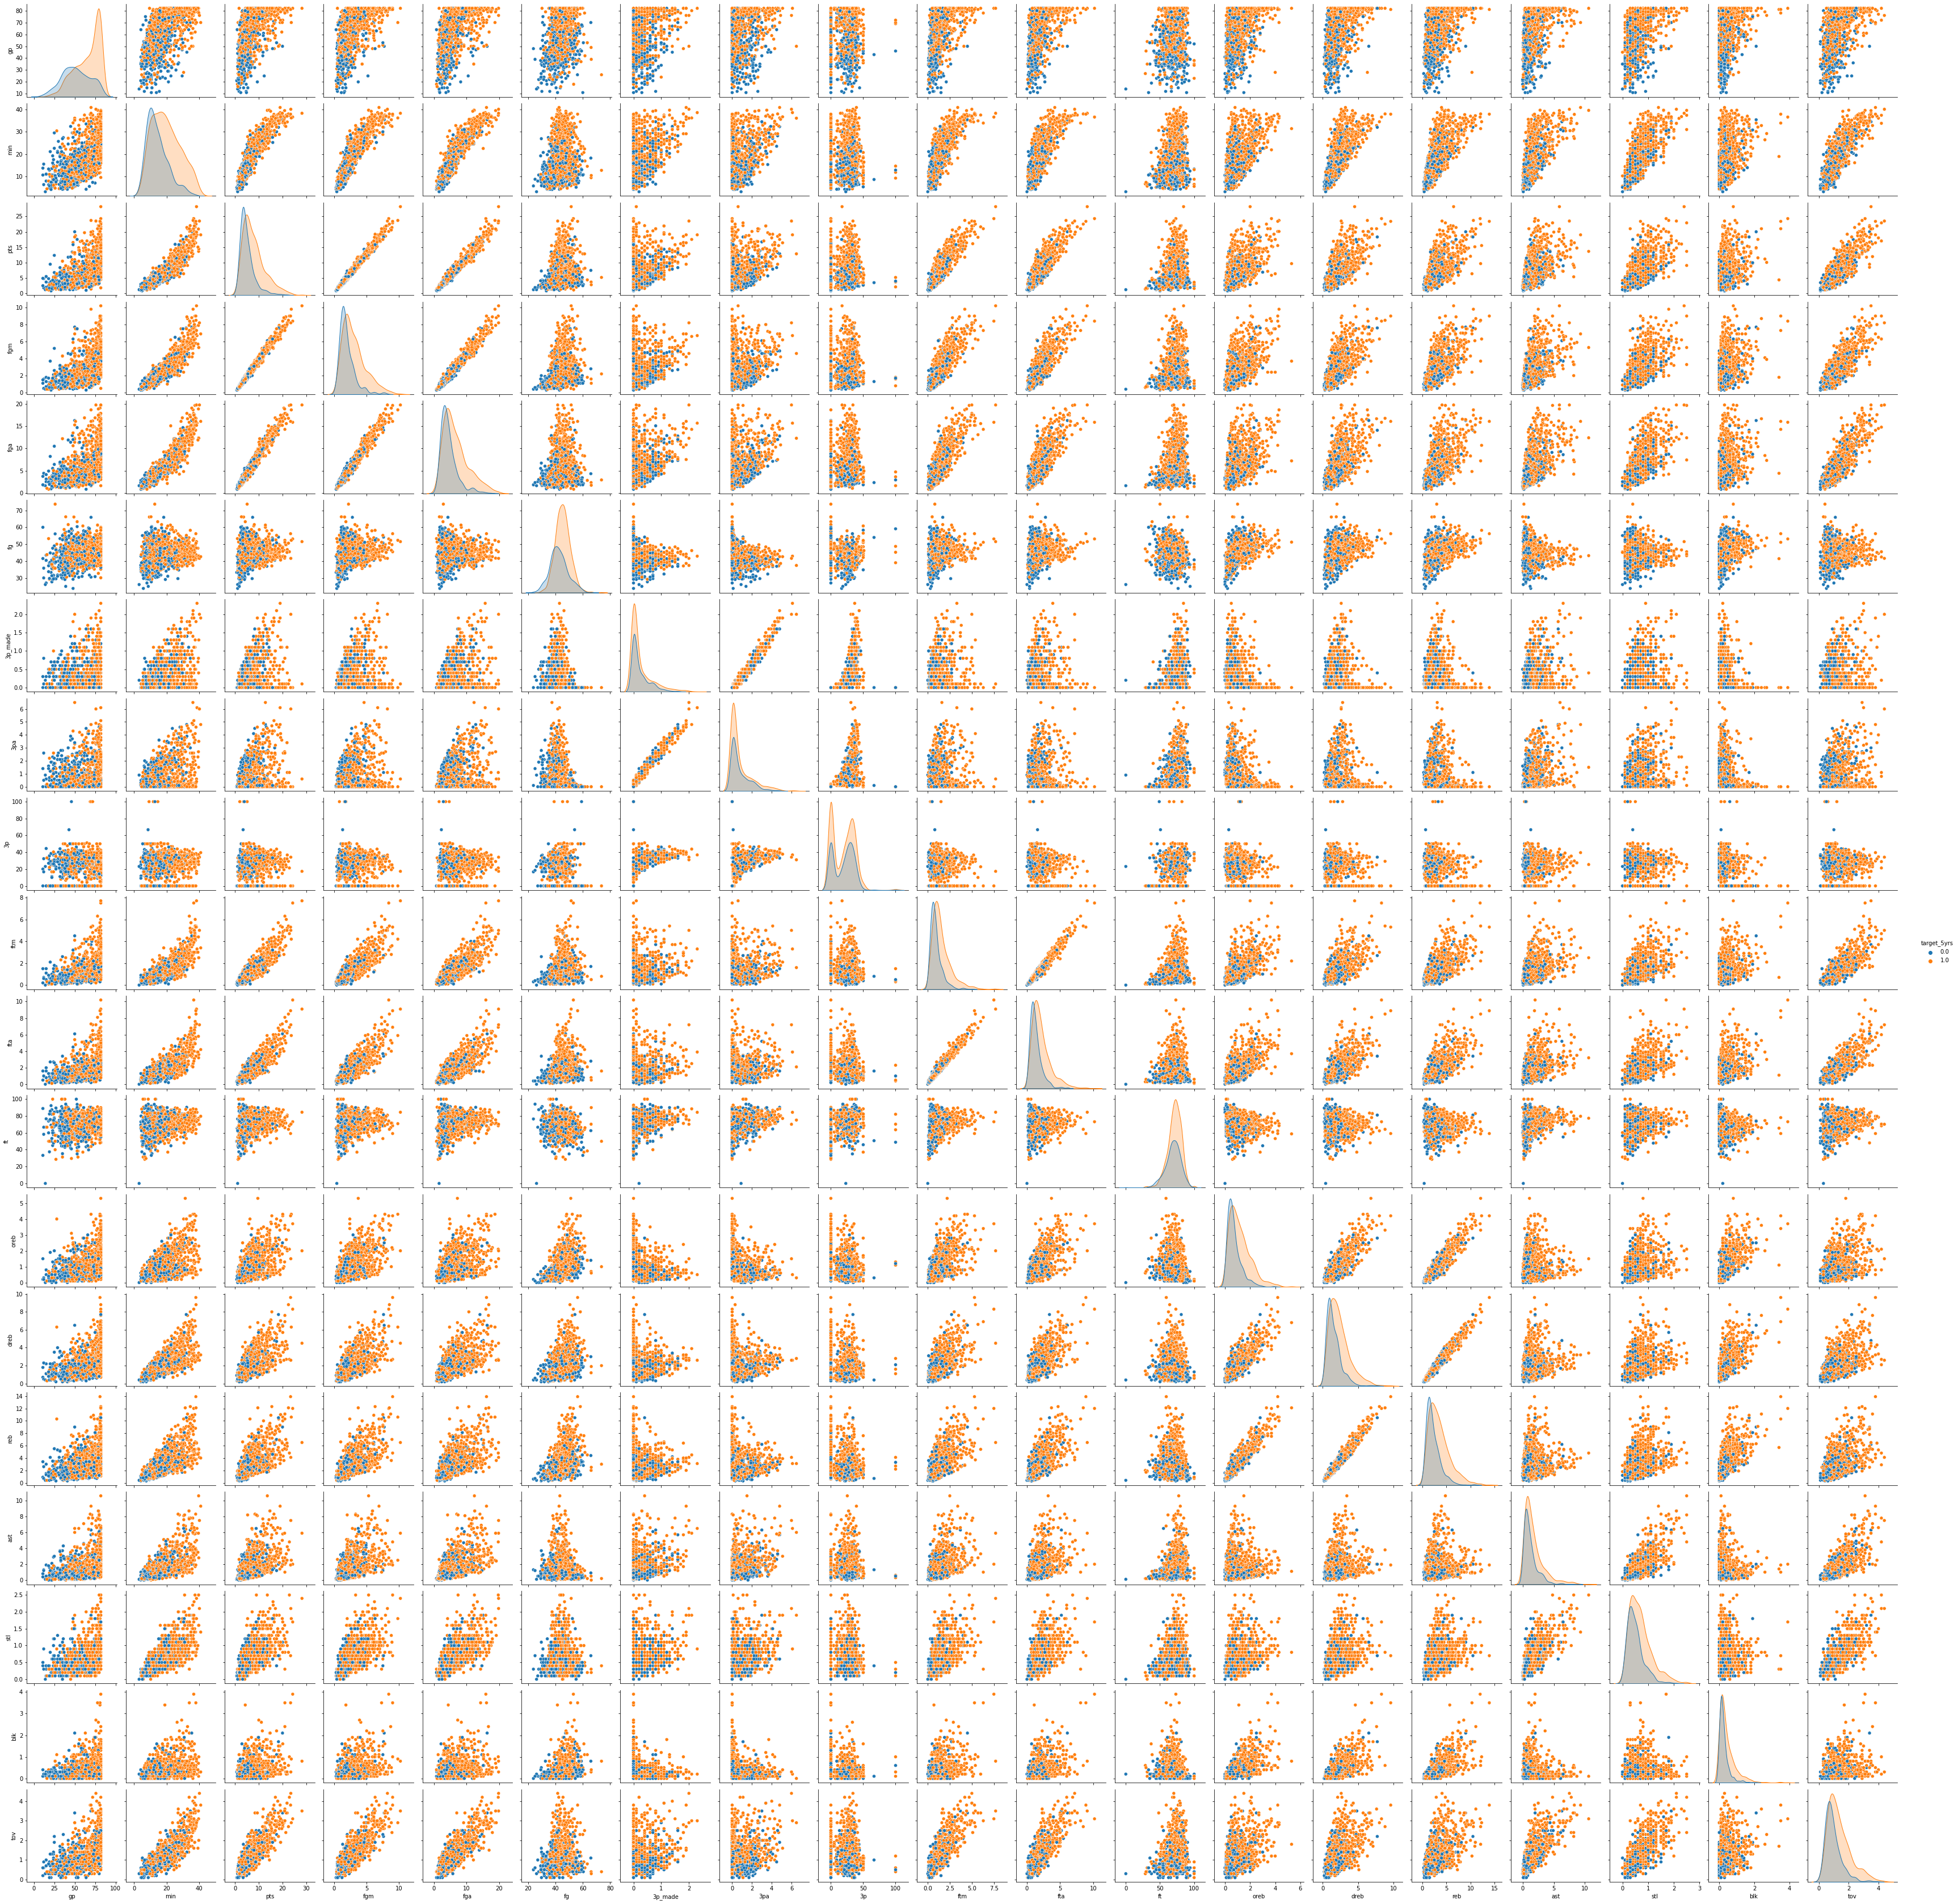

In [10]:
sns.pairplot(df, hue='target_5yrs')

In [11]:
df.corr()

gp       min       pts       fgm       fga        fg  \
gp           1.000000  0.590240  0.538471  0.542724  0.516625  0.296289   
min          0.590240  1.000000  0.911822  0.903060  0.910247  0.203901   
pts          0.538471  0.911822  1.000000  0.990834  0.979733  0.255333   
fgm          0.542724  0.903060  0.990834  1.000000  0.980050  0.291693   
fga          0.516625  0.910247  0.979733  0.980050  1.000000  0.129798   
fg           0.296289  0.203901  0.255333  0.291693  0.129798  1.000000   
3p_made      0.107423  0.389920  0.346682  0.289007  0.390253 -0.294471   
3pa          0.098772  0.403258  0.356751  0.299057  0.413560 -0.350658   
3p           0.038209  0.165997  0.151072  0.119493  0.197160 -0.330690   
ftm          0.482123  0.791000  0.896297  0.848019  0.826616  0.245776   
fta          0.479487  0.779609  0.880703  0.840408  0.805559  0.300154   
ft           0.196299  0.239878  0.258931  0.223566  0.269614 -0.161183   
oreb         0.401136  0.573062  0.575106  0.596687  0.504212  0.511367   
dreb         0.466840  0.745513  0.693934  0.703278  0.640123  0.410555   
reb          0.460406  0.709707  0.676849  0.691186  0.614328  0.465423   
ast          0.372749  0.629015  0.552338  0.532534  0.589818 -0.108797   
stl          0.451137  0.757034  0.675341  0.662640  0.690168  0.056658   
blk          0.276498  0.399088  0.387043  0.398125  0.322184  0.391626   
tov          0.518167  0.826500  0.850366  0.834352  0.845989  0.121806   
target_5yrs  0.396833  0.317805  0.315981  0.317594  0.292660  0.227134   

              3p_made       3pa        3p       ftm       fta        ft  \
gp           0.107423  0.098772  0.038209  0.482123  0.479487  0.196299   
min          0.389920  0.403258  0.165997  0.791000  0.779609  0.239878   
pts          0.346682  0.356751  0.151072  0.896297  0.880703  0.258931   
fgm          0.289007  0.299057  0.119493  0.848019  0.840408  0.223566   
fga          0.390253  0.413560  0.197160  0.826616  0.805559  0.269614   
fg          -0.294471 -0.350658 -0.330690  0.245776  0.300154 -0.161183   
3p_made      1.000000  0.982616  0.589855  0.158472  0.095396  0.314355   
3pa          0.982616  1.000000  0.582337  0.173533  0.108388  0.323612   
3p           0.589855  0.582337  1.000000  0.030320 -0.032333  0.326372   
ftm          0.158472  0.173533  0.030320  1.000000  0.980505  0.257818   
fta          0.095396  0.108388 -0.032333  0.980505  1.000000  0.114872   
ft           0.314355  0.323612  0.326372  0.257818  0.114872  1.000000   
oreb        -0.219010 -0.231897 -0.288759  0.583865  0.653445 -0.146786   
dreb         0.016570  0.011226 -0.122949  0.653823  0.700863 -0.022905   
reb         -0.072503 -0.080939 -0.191071  0.653833  0.711425 -0.071105   
ast          0.376604  0.410531  0.262120  0.476214  0.428624  0.296315   
stl          0.306908  0.338631  0.194329  0.600158  0.580065  0.207205   
blk         -0.158535 -0.172150 -0.242274  0.407466  0.468974 -0.161152   
tov          0.258369  0.283925  0.108277  0.804990  0.798936  0.199742   
target_5yrs  0.036619  0.018110 -0.003411  0.296841  0.296089  0.106706   

                 oreb      dreb       reb       ast       stl       blk  \
gp           0.401136  0.466840  0.460406  0.372749  0.451137  0.276498   
min          0.573062  0.745513  0.709707  0.629015  0.757034  0.399088   
pts          0.575106  0.693934  0.676849  0.552338  0.675341  0.387043   
fgm          0.596687  0.703278  0.691186  0.532534  0.662640  0.398125   
fga          0.504212  0.640123  0.614328  0.589818  0.690168  0.322184   
fg           0.511367  0.410555  0.465423 -0.108797  0.056658  0.391626   
3p_made     -0.219010  0.016570 -0.072503  0.376604  0.306908 -0.158535   
3pa         -0.231897  0.011226 -0.080939  0.410531  0.338631 -0.172150   
3p          -0.288759 -0.122949 -0.191071  0.262120  0.194329 -0.242274   
ftm          0.583865  0.653823  0.653833  0.476214  0.600158  0.407466   
fta          0.653445  0.700863  0.711425 

In [15]:
feature_list = df.columns

In [17]:
feature_list

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs'],
      dtype='object')

<ipython-input-28-4237438e7e90>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


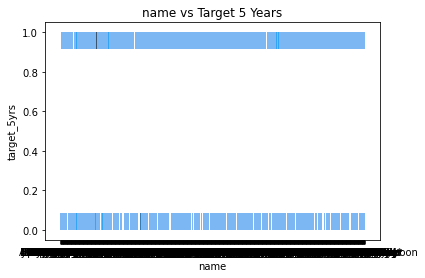

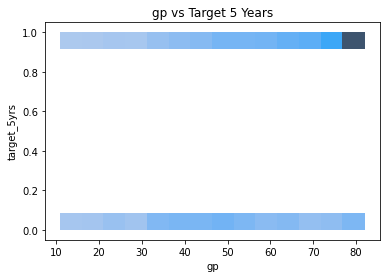

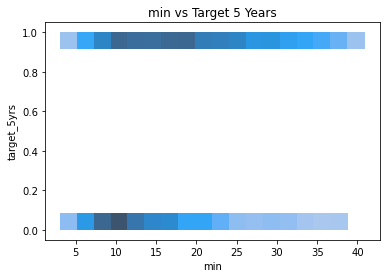

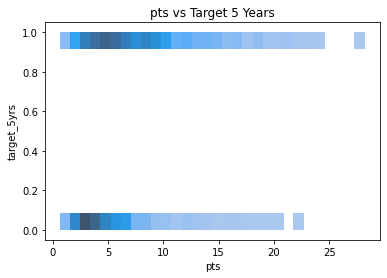

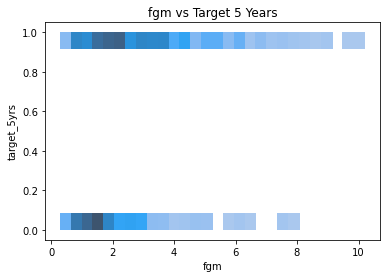

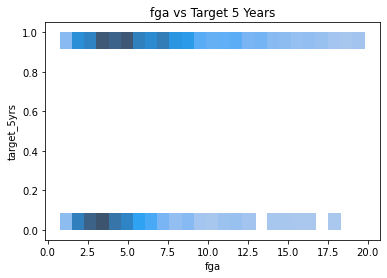

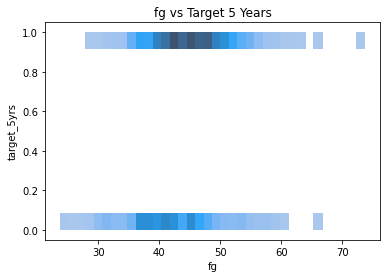

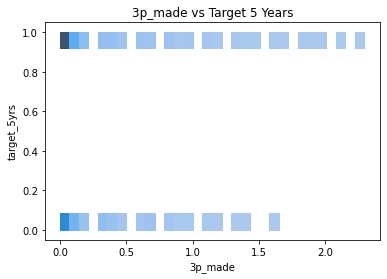

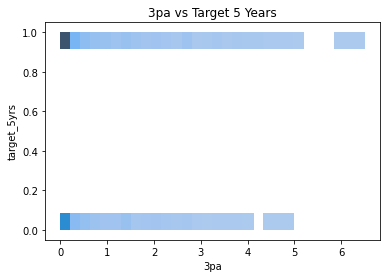

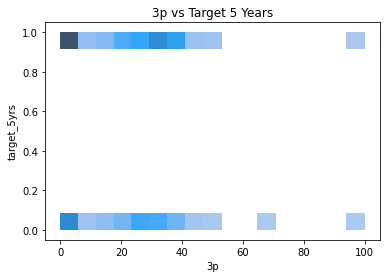

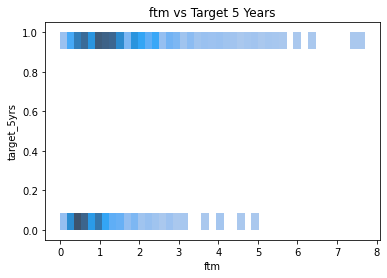

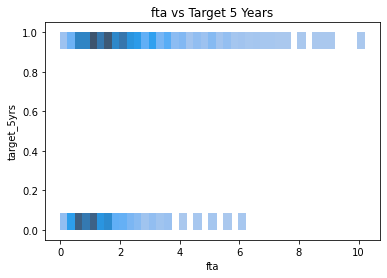

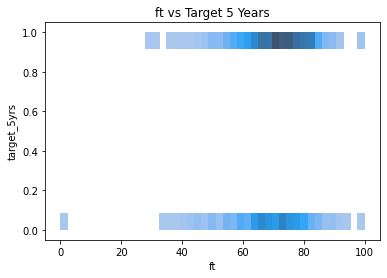

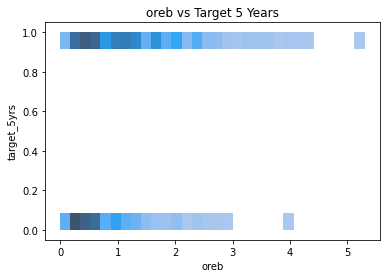

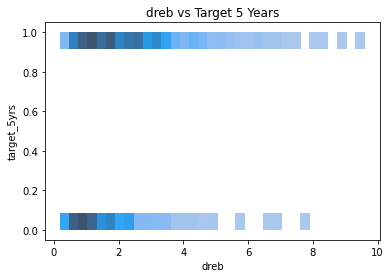

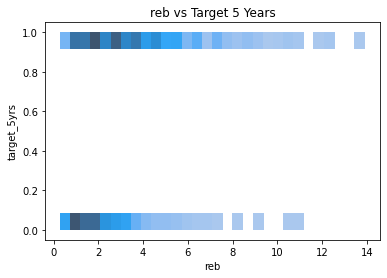

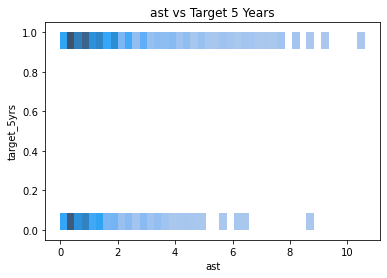

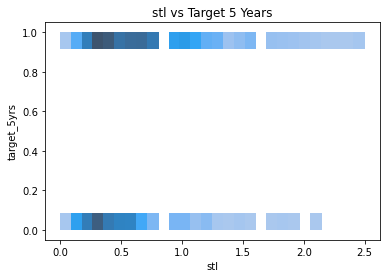

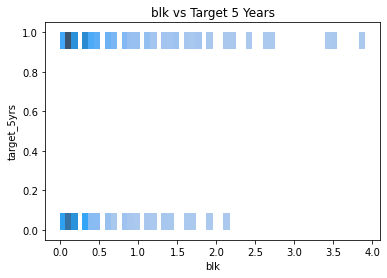

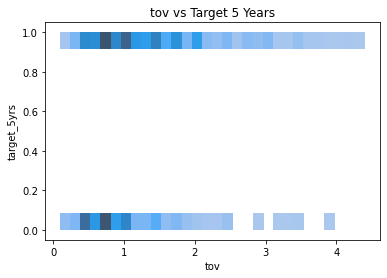

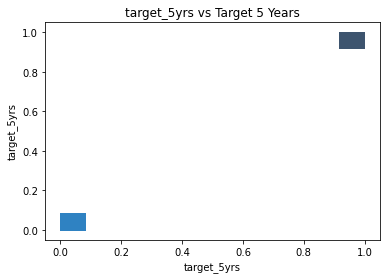

<Figure size 432x288 with 0 Axes>

In [28]:
for i in feature_list:
    sns.histplot(data=df,x=df[i], y=df['target_5yrs'])
    plt.title('{} vs Target 5 Years'.format(i))
    plt.figure()
plt.show()

<ipython-input-30-c5f7c77e0a8c>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


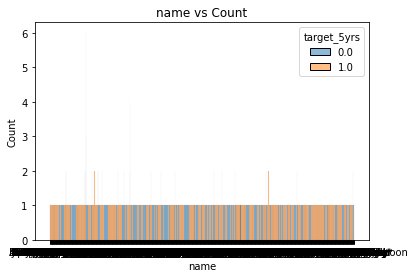

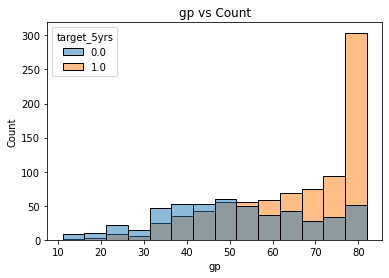

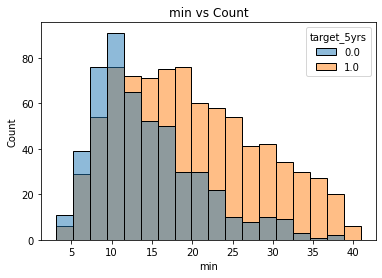

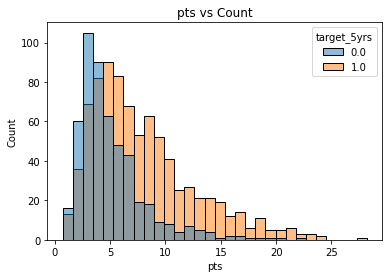

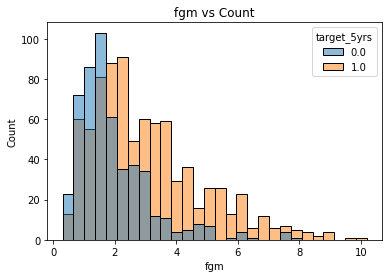

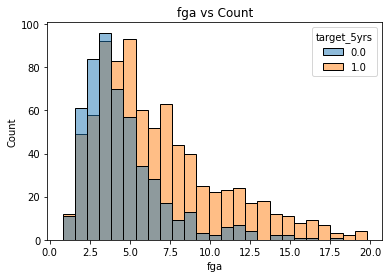

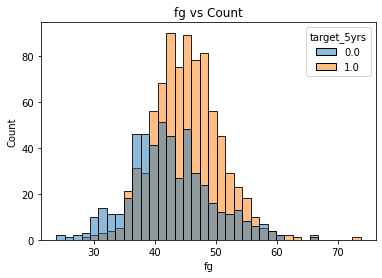

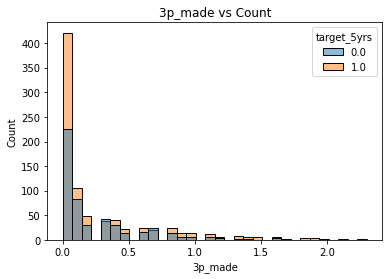

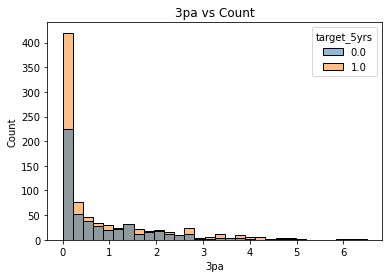

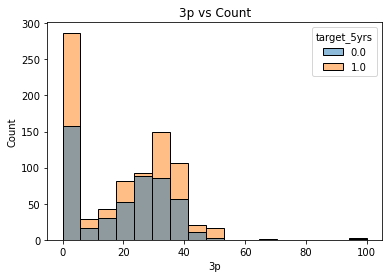

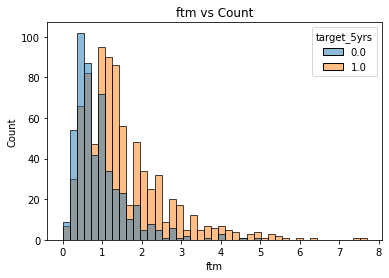

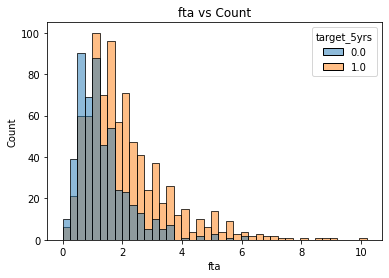

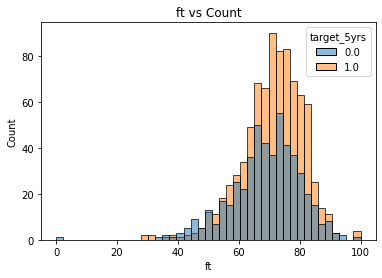

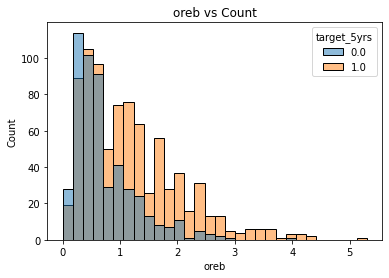

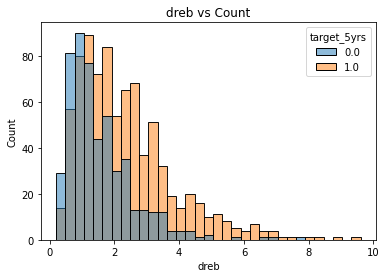

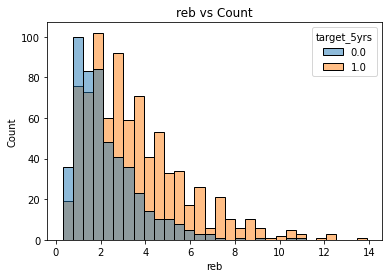

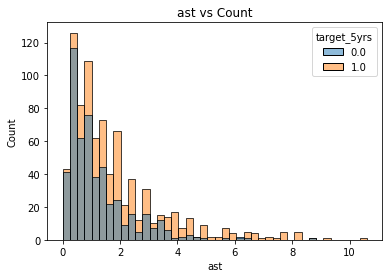

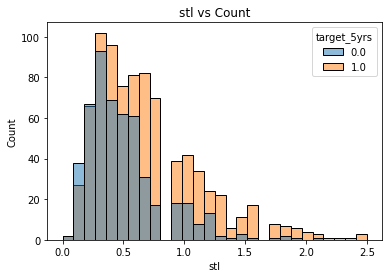

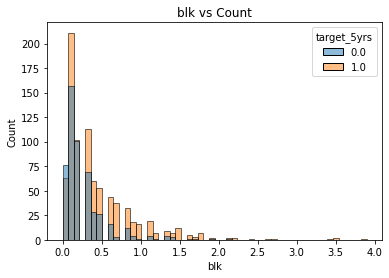

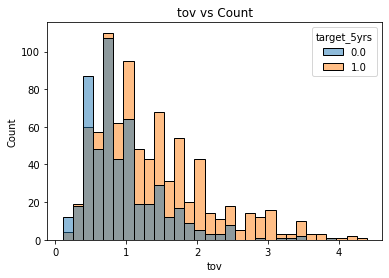

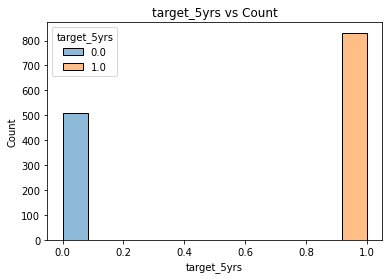

<Figure size 432x288 with 0 Axes>

In [30]:
for i in feature_list:
    sns.histplot(data=df,x=df[i], hue=df['target_5yrs'])
    plt.title('{} vs Count'.format(i))
    plt.figure()
plt.show()

### Test with Standard Scaler applied across variables

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [31]:
scaler.fit(df.drop(['name','target_5yrs'], axis=1))

StandardScaler()

In [32]:
scaled_features = scaler.transform(df.drop(['name','target_5yrs'], axis=1))

In [33]:
scaled_features

array([[-1.40090082,  1.17706613,  0.13740097, ..., -0.53345799,
         0.07325418,  0.14733795],
       [-1.45828144,  1.11686044,  0.09148643, ...,  1.17550237,
         0.30641476,  0.56269458],
       [ 0.77956287, -0.27991152, -0.36765896, ..., -0.28932079,
        -0.1599064 , -0.26801868],
       ...,
       [-0.99923645, -0.66522792, -0.32174442, ..., -0.77759518,
         0.07325418, -0.40647089],
       [-0.48281084, -0.67726906, -0.52835985, ..., -0.53345799,
        -0.62622755, -0.5449231 ],
       [-0.76971396, -0.71339247, -0.55131712, ...,  0.19895359,
        -0.62622755, -0.40647089]])

In [35]:
scaled_features_df = pd.DataFrame(scaled_features, columns=df.columns[1:-1])

In [36]:
scaled_features_df

gp       min       pts       fgm       fga        fg   3p_made  \
0    -1.400901  1.177066  0.137401 -0.017294  0.477347 -1.543407  0.658041   
1    -1.458281  1.116860  0.091486 -0.373816  0.226801 -2.374651  1.179494   
2     0.779563 -0.279912 -0.367659 -0.373816 -0.329969 -0.320991  0.397315   
3    -0.138527 -0.725434 -0.252873 -0.195555 -0.107261 -0.255795 -0.384863   
4    -0.712333 -0.737475 -0.528360 -0.611497 -0.803224  1.341496 -0.645589   
...        ...       ...       ...       ...       ...       ...       ...   
1335  1.123847 -0.219706 -0.574274 -0.611497 -0.636193 -0.141703 -0.645589   
1336  0.435279 -0.605022 -0.666103 -0.670917 -0.497000 -1.364120 -0.384863   
1337 -0.999236 -0.665228 -0.321744 -0.254975 -0.552677  1.765267 -0.645589   
1338 -0.482811 -0.677269 -0.528360 -0.552077 -0.580516 -0.043910 -0.645589   
1339 -0.769714 -0.713392 -0.551317 -0.611497 -0.413485 -1.184832  0.397315   

           3pa        3p       ftm       fta        ft      oreb      dreb  \
0     1.244354  0.355367  0.306333  0.361484 -0.037855 -0.398290  1.010852   
1     1.903829  0.261716  1.319630  1.193248  0.586286 -0.655746 -0.018938   
2     0.867511  0.317907 -0.402975 -0.394665 -0.312099 -0.655746 -0.239607   
3    -0.263016  0.205525 -0.402975 -0.394665 -0.132422 -0.012104 -0.828059   
4    -0.639859 -1.205486  0.002344  0.059025 -0.274272 -0.012104 -0.386720   
...        ...       ...       ...       ...       ...       ...       ...   
1335 -0.545648 -0.312678 -0.098985 -0.243435  0.841617 -0.784475 -0.901616   
1336 -0.074595 -0.162836 -0.504304 -0.621509  0.860530 -0.784475 -0.680946   
1337 -0.734070 -1.205486 -0.301645 -0.167820 -0.567429  0.631538  0.201731   
1338 -0.545648 -0.581145 -0.098985 -0.016590 -0.737650 -1.041932 -1.195841   
1339  0.490669  0.873570 -0.605634 -0.621509 -0.283729 -1.041932 -0.975172   

           reb       ast       stl       blk       tov  
0     0.517997  0.237640 -0.533458  0.073254  0.147338  
1    -0.308447  1.461613  1.175502  0.306415  0.562695  
2    -0.405676 -0.374347 -0.289321 -0.159906 -0.268019  
3    -0.551519 -0.510344 -0.045184 -0.626228 -0.268019  
4    -0.259833 -0.850337 -0.777595  0.073254 -0.544923  
...        ...       ...       ...       ...       ...  
1335 -0.891819  0.645631 -0.045184 -0.393067 -0.544923  
1336 -0.745976  0.509634  0.443091 -0.859388  0.147338  
1337  0.372154 -0.850337 -0.777595  0.073254 -0.406471  
1338 -1.134891  0.441635 -0.533458 -0.626228 -0.544923  
1339 -1.037662 -0.102353  0.198954 -0.626228 -0.406471  

[1340 rows x 19 columns]

In [57]:
scaled_features_df.isnull().sum()

gp          0
min         0
pts         0
fgm         0
fga         0
fg          0
3p_made     0
3pa         0
3p         11
ftm         0
fta         0
ft          0
oreb        0
dreb        0
reb         0
ast         0
stl         0
blk         0
tov         0
dtype: int64

In [58]:
scaled_features_df['3p'].fillna(scaled_features_df['3p'].mean(), inplace=True)

In [59]:
scaled_features_df.isnull().sum()

gp         0
min        0
pts        0
fgm        0
fga        0
fg         0
3p_made    0
3pa        0
3p         0
ftm        0
fta        0
ft         0
oreb       0
dreb       0
reb        0
ast        0
stl        0
blk        0
tov        0
dtype: int64

### Test Train Split

In [37]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test, Y_train, Y_test = train_test_split(scaled_features_df, df['target_5yrs'], test_size=0.25, random_state=40)

In [75]:
X_train

gp       min       pts       fgm       fga        fg   3p_made  \
726   0.148376 -0.773598 -0.666103 -0.552077 -0.691870  0.868828 -0.645589   
468   0.090995 -0.412364 -0.275830 -0.314395 -0.413485  0.705839 -0.645589   
519  -0.654953 -0.556858 -0.666103 -0.611497 -0.636193 -0.109105 -0.645589   
383  -0.081146 -0.580940 -0.390616 -0.433236 -0.357808 -0.418784 -0.645589   
8     0.263137 -0.930133 -1.010463 -0.968019 -0.970255 -0.809957 -0.384863   
...        ...       ...       ...       ...       ...       ...       ...   
1330  1.238608  0.153569 -0.046257 -0.195555 -0.357808  0.950322 -0.645589   
1016 -0.769714 -0.544817 -0.574274 -0.552077 -0.747547  1.537082 -0.645589   
165   0.607421  1.538300  2.180598  2.062416  1.813595  0.868828 -0.645589   
7    -0.712333 -0.881968 -0.252873 -0.195555 -0.135100 -0.435083  0.397315   
219  -1.343520 -1.122791 -0.757933 -0.730337 -0.858901  0.787334 -0.645589   

           3pa        3p       ftm       fta        ft      oreb      dreb  \
726  -0.734070 -1.205486 -0.808293 -0.772739 -0.539059 -0.140833 -0.239607   
468  -0.734070 -1.205486  0.103674  0.437099 -1.248310  0.888995  0.054618   
519  -0.734070 -1.205486 -0.504304 -0.394665 -1.030807 -0.269561 -0.828059   
383  -0.639859 -1.205486 -0.098985 -0.092205  0.028342 -0.269561 -0.533833   
8    -0.263016  0.249229 -0.909623 -0.999584  0.103995 -1.041932 -1.048728   
...        ...       ...       ...       ...       ...       ...       ...   
1330 -0.734070 -1.205486  0.711652  0.815174 -0.028398  1.403908  0.863739   
1016 -0.734070 -1.205486 -0.402975 -0.167820 -1.409074  0.245352  0.495957   
165  -0.734070 -1.205486  2.738246  2.781161  0.208019  1.790093  1.525748   
7     0.679090  0.667538 -0.605634 -0.772739  1.626521 -0.269561 -0.828059   
219  -0.734070 -1.205486 -0.504304 -0.470280 -0.274272 -0.655746 -0.975172   

           reb       ast       stl       blk       tov  
726  -0.259833 -0.918335 -0.533458 -0.159906 -1.375636  
468   0.323539 -0.510344 -0.533458  0.539575  0.008886  
519  -0.697362 -0.510344 -0.533458 -0.859388 -0.960280  
383  -0.454290 -0.102353 -0.777595 -0.393067  0.147338  
8    -1.086277  0.509634 -0.777595 -0.859388 -0.129566  
...        ...       ...       ...       ...       ...  
1330  1.101369 -0.374347  0.198954 -0.393067  0.008886  
1016  0.420768 -0.986334 -0.533458  0.772736 -0.821828  
165   1.684741 -0.034354  0.931365  2.171699  1.254956  
7    -0.648748 -0.918335 -1.021732 -0.626228 -0.683375  
219  -0.843205 -0.714340 -0.289321 -0.393067 -0.960280  

[1005 rows x 19 columns]

In [76]:
X_train.isnull().sum()

gp         0
min        0
pts        0
fgm        0
fga        0
fg         0
3p_made    0
3pa        0
3p         0
ftm        0
fta        0
ft         0
oreb       0
dreb       0
reb        0
ast        0
stl        0
blk        0
tov        0
dtype: int64

### Using Logistic Regression model to predict values

In [63]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_train, Y_train)

LogisticRegression()

In [79]:
X_train.isnull().values.any()

False

In [ ]:
#X_train['3p'].mean()

In [ ]:
#X_train['3p'].fillna(X_train['3p'].mean(), inplace=True)

In [ ]:
#X_train.isnull().sum()

In [67]:
#Restart Training

In [81]:
pred_1 = model.predict(X_test)

### Evaluation

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
print(confusion_matrix(pred_1,Y_test))

[[ 72  39]
 [ 66 158]]


In [84]:
print(classification_report(pred_1,Y_test))

              precision    recall  f1-score   support

         0.0       0.52      0.65      0.58       111
         1.0       0.80      0.71      0.75       224

    accuracy                           0.69       335
   macro avg       0.66      0.68      0.66       335
weighted avg       0.71      0.69      0.69       335



### Lets use Support Vector Machines

In [85]:
from sklearn.svm import SVC

In [86]:
svm_model = SVC()

In [87]:
svm_model.fit(X_train, Y_train)

SVC()

In [88]:
svm_pred = svm_model.predict(X_test)

In [90]:
print(confusion_matrix(svm_pred,Y_test))
print(classification_report(svm_pred,Y_test))

[[ 66  37]
 [ 72 160]]
              precision    recall  f1-score   support

         0.0       0.48      0.64      0.55       103
         1.0       0.81      0.69      0.75       232

    accuracy                           0.67       335
   macro avg       0.65      0.67      0.65       335
weighted avg       0.71      0.67      0.68       335



### Now we restart without Standard Scaler

In [26]:
df_1 = pd.read_csv("nba_logreg.csv")

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1329 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

In [28]:
df_1.isnull().sum()

name            0
gp              0
min             0
pts             0
fgm             0
fga             0
fg              0
3p_made         0
3pa             0
3p             11
ftm             0
fta             0
ft              0
oreb            0
dreb            0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
dtype: int64

In [29]:
df_1.drop('name', axis=1)

gp   min  pts  fgm  fga    fg  3p_made  3pa    3p  ftm  fta    ft  oreb  \
0     36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1     35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2     74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3     58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4     48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   
...   ..   ...  ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   ...   
1335  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  1.2  1.5  79.2   0.4   
1336  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  0.8  1.0  79.4   0.4   
1337  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  1.0  1.6  64.3   1.5   
1338  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  1.2  1.8  62.5   0.2   
1339  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  0.7  1.0  67.3   0.2   

      dreb  reb  ast  stl  blk  tov  target_5yrs  
0      3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1      2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2      1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3      0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4      1.5  2.5  0.3  0.3  0.4  0.8          1.0  
...    ...  ...  ...  ...  ...  ...          ...  
1335   0.8  1.2  2.5  0.6  0.2  0.8          0.0  
1336   1.1  1.5  2.3  0.8  0.0  1.3          1.0  
1337   2.3  3.8  0.3  0.3  0.4  0.9          0.0  
1338   0.4  0.7  2.2  0.4  0.1  0.8          1.0  
1339   0.7  0.9  1.4  0.7  0.1  0.9          1.0  

[1340 rows x 20 columns]

In [30]:
#df_1['3p'].fillna(df_1['3p'].mean, inplace=True)

In [44]:
df_2 = df_1.dropna()

In [45]:
df_2.isnull().sum()

name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [46]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1329 non-null   object 
 1   gp           1329 non-null   int64  
 2   min          1329 non-null   float64
 3   pts          1329 non-null   float64
 4   fgm          1329 non-null   float64
 5   fga          1329 non-null   float64
 6   fg           1329 non-null   float64
 7   3p_made      1329 non-null   float64
 8   3pa          1329 non-null   float64
 9   3p           1329 non-null   float64
 10  ftm          1329 non-null   float64
 11  fta          1329 non-null   float64
 12  ft           1329 non-null   float64
 13  oreb         1329 non-null   float64
 14  dreb         1329 non-null   float64
 15  reb          1329 non-null   float64
 16  ast          1329 non-null   float64
 17  stl          1329 non-null   float64
 18  blk          1329 non-null   float64
 19  tov   

In [47]:
X = df_2.drop(['name','target_5yrs'], axis=1)

In [48]:
X

gp   min  pts  fgm  fga    fg  3p_made  3pa    3p  ftm  fta    ft  oreb  \
0     36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1     35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2     74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3     58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4     48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   
...   ..   ...  ...  ...  ...   ...      ...  ...   ...  ...  ...   ...   ...   
1335  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  1.2  1.5  79.2   0.4   
1336  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  0.8  1.0  79.4   0.4   
1337  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  1.0  1.6  64.3   1.5   
1338  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  1.2  1.8  62.5   0.2   
1339  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  0.7  1.0  67.3   0.2   

      dreb  reb  ast  stl  blk  tov  
0      3.4  4.1  1.9  0.4  0.4  1.3  
1      2.0  2.4  3.7  1.1  0.5  1.6  
2      1.7  2.2  1.0  0.5  0.3  1.0  
3      0.9  1.9  0.8  0.6  0.1  1.0  
4      1.5  2.5  0.3  0.3  0.4  0.8  
...    ...  ...  ...  ...  ...  ...  
1335   0.8  1.2  2.5  0.6  0.2  0.8  
1336   1.1  1.5  2.3  0.8  0.0  1.3  
1337   2.3  3.8  0.3  0.3  0.4  0.9  
1338   0.4  0.7  2.2  0.4  0.1  0.8  
1339   0.7  0.9  1.4  0.7  0.1  0.9  

[1329 rows x 19 columns]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1339
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gp       1329 non-null   int64  
 1   min      1329 non-null   float64
 2   pts      1329 non-null   float64
 3   fgm      1329 non-null   float64
 4   fga      1329 non-null   float64
 5   fg       1329 non-null   float64
 6   3p_made  1329 non-null   float64
 7   3pa      1329 non-null   float64
 8   3p       1329 non-null   float64
 9   ftm      1329 non-null   float64
 10  fta      1329 non-null   float64
 11  ft       1329 non-null   float64
 12  oreb     1329 non-null   float64
 13  dreb     1329 non-null   float64
 14  reb      1329 non-null   float64
 15  ast      1329 non-null   float64
 16  stl      1329 non-null   float64
 17  blk      1329 non-null   float64
 18  tov      1329 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 207.7 KB


In [50]:
Y = df_2['target_5yrs']

In [51]:
Y

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1335    0.0
1336    1.0
1337    0.0
1338    1.0
1339    1.0
Name: target_5yrs, Length: 1329, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [54]:
from sklearn.linear_model import LogisticRegression

In [59]:
log_reg = LogisticRegression(max_iter=1000)

In [60]:
log_reg.fit(X1_train, Y1_train)

C:\Users\rutwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [62]:
log_reg_pred = log_reg.predict(X1_test)

In [100]:
from sklearn.metrics import log_loss

In [102]:
loss = log_loss(X1_test, log_reg_pred)
loss

ValueError: Multioutput target data is not supported with label binarization

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(confusion_matrix(log_reg_pred, Y1_test))

[[ 71  42]
 [ 58 162]]


In [65]:
print(classification_report(log_reg_pred, Y1_test))

              precision    recall  f1-score   support

         0.0       0.55      0.63      0.59       113
         1.0       0.79      0.74      0.76       220

    accuracy                           0.70       333
   macro avg       0.67      0.68      0.68       333
weighted avg       0.71      0.70      0.70       333



### Neural Network approach

<AxesSubplot:xlabel='target_5yrs', ylabel='count'>

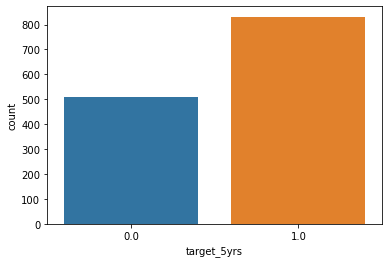

In [66]:
sns.countplot(x='target_5yrs', data=df_1)

In [68]:
df_1.corr()['target_5yrs']

gp             0.396833
min            0.317805
pts            0.315981
fgm            0.317594
fga            0.292660
fg             0.227134
3p_made        0.036619
3pa            0.018110
3p            -0.003411
ftm            0.296841
fta            0.296089
ft             0.106706
oreb           0.293307
dreb           0.284677
reb            0.299406
ast            0.175353
stl            0.229811
blk            0.210114
tov            0.272348
target_5yrs    1.000000
Name: target_5yrs, dtype: float64

<AxesSubplot:>

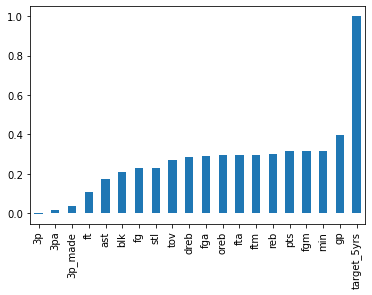

In [69]:
df_1.corr()['target_5yrs'].sort_values().plot(kind='bar')

In [70]:
import tensorflow as tf

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [80]:
model = Sequential()

model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=9, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [86]:
model.fit(x=X1_train, y=Y1_train, validation_data=(X1_test, Y1_test), epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 0s 4ms/step - loss: 0.5366 - val_loss: 0.6326
Epoch 2/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5081 - val_loss: 0.6330
Epoch 3/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5117 - val_loss: 0.6275
Epoch 4/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5090 - val_loss: 0.6294
Epoch 5/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5093 - val_loss: 0.6262
Epoch 6/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5046 - val_loss: 0.6435
Epoch 7/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5152 - val_loss: 0.6357
Epoch 8/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5041 - val_loss: 0.6295
Epoch 9/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5048 - val_loss: 0.6336
Epoch 10/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5036 - val_loss: 0.6353
Epoch 11/

32/32 [==============================] - 0s 1ms/step - loss: 0.4965 - val_loss: 0.6785
Epoch 84/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4896 - val_loss: 0.6721
Epoch 85/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4936 - val_loss: 0.6642
Epoch 86/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4885 - val_loss: 0.6741
Epoch 87/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4954 - val_loss: 0.6649
Epoch 88/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5049 - val_loss: 0.6618
Epoch 89/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4875 - val_loss: 0.6701
Epoch 90/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4915 - val_loss: 0.6646
Epoch 91/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4985 - val_loss: 0.6586
Epoch 92/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4947 - val_loss: 0.6836
Epoch 93/300


32/32 [==============================] - 0s 1ms/step - loss: 0.4930 - val_loss: 0.6855
Epoch 165/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4828 - val_loss: 0.6927
Epoch 166/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4826 - val_loss: 0.7149
Epoch 167/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4793 - val_loss: 0.7207
Epoch 168/300
32/32 [==============================] - 0s 1ms/step - loss: 0.5059 - val_loss: 0.7012
Epoch 169/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4900 - val_loss: 0.7030
Epoch 170/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4852 - val_loss: 0.7053
Epoch 171/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4752 - val_loss: 0.7303
Epoch 172/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4803 - val_loss: 0.6981
Epoch 173/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4804 - val_loss: 0.6968
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.4746 - val_loss: 0.7478
Epoch 246/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4681 - val_loss: 0.7559
Epoch 247/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4688 - val_loss: 0.7387
Epoch 248/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4852 - val_loss: 0.7386
Epoch 249/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4708 - val_loss: 0.7645
Epoch 250/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4702 - val_loss: 0.7388
Epoch 251/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4686 - val_loss: 0.7492
Epoch 252/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4812 - val_loss: 0.7443
Epoch 253/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4650 - val_loss: 0.7596
Epoch 254/300
32/32 [==============================] - 0s 1ms/step - loss: 0.4839 - val_loss: 0.7269
Epoc

In [87]:
model.history.history

{'loss': [0.5365597605705261,
  0.5080587863922119,
  0.5116584897041321,
  0.5090189576148987,
  0.5092563629150391,
  0.5046289563179016,
  0.5152428150177002,
  0.5041093826293945,
  0.5048431754112244,
  0.5036417245864868,
  0.5078666806221008,
  0.5109171271324158,
  0.5110313892364502,
  0.5086666941642761,
  0.5136933922767639,
  0.5012540221214294,
  0.5023291110992432,
  0.5143283605575562,
  0.5011044144630432,
  0.5060284733772278,
  0.49642911553382874,
  0.4999782145023346,
  0.5031794905662537,
  0.5043224692344666,
  0.505659282207489,
  0.5084617137908936,
  0.5024703145027161,
  0.5017117857933044,
  0.49937236309051514,
  0.5085470676422119,
  0.5053123235702515,
  0.5118563175201416,
  0.49935853481292725,
  0.5099216103553772,
  0.5055574774742126,
  0.513732373714447,
  0.49724331498146057,
  0.5063822269439697,
  0.500829815864563,
  0.49984925985336304,
  0.49722909927368164,
  0.4957440197467804,
  0.5299271941184998,
  0.5162386894226074,
  0.4967060983181,
  

In [91]:
model_loss = pd.DataFrame(model.history.history)

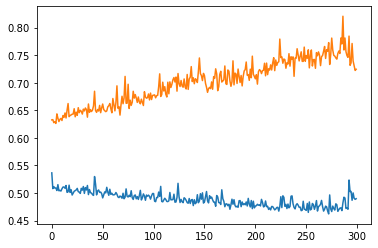

In [92]:
plt.plot(model_loss)

In [110]:
model_pred = model.predict(X1_test)
for i in range(len(model_pred)):
    if model_pred[i]>=0.5:
        model_pred[i]=1
    else:
        model_pred[i]=0
model_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [111]:
print(confusion_matrix(Y1_test, model_pred))

[[ 70  59]
 [ 59 145]]


In [90]:
from tensorflow.keras.layers import Dropout

In [95]:
model_1 = Sequential()

model_1.add(Dense(units=19, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(units=9, activation='relu'))
model_1.add(Dropout(0.5))
#model_1.add(Dense(units=9, activation='relu'))

model_1.add(Dense(units=1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam')

In [96]:
model_1.fit(x=X1_train, y=Y1_train, validation_data=(X1_test, Y1_test), epochs=300, verbose=1)

Epoch 1/300
32/32 [==============================] - 0s 3ms/step - loss: 3.3647 - val_loss: 0.8666
Epoch 2/300
32/32 [==============================] - 0s 1ms/step - loss: 1.9880 - val_loss: 0.7060
Epoch 3/300
32/32 [==============================] - 0s 1ms/step - loss: 1.4842 - val_loss: 0.6621
Epoch 4/300
32/32 [==============================] - 0s 1ms/step - loss: 1.2401 - val_loss: 0.6643
Epoch 5/300
32/32 [==============================] - 0s 1ms/step - loss: 0.9806 - val_loss: 0.6711
Epoch 6/300
32/32 [==============================] - 0s 1ms/step - loss: 0.9010 - val_loss: 0.6729
Epoch 7/300
32/32 [==============================] - 0s 1ms/step - loss: 0.8563 - val_loss: 0.6714
Epoch 8/300
32/32 [==============================] - 0s 1ms/step - loss: 0.7423 - val_loss: 0.6702
Epoch 9/300
32/32 [==============================] - 0s 1ms/step - loss: 0.7580 - val_loss: 0.6711
Epoch 10/300
32/32 [==============================] - 0s 1ms/step - loss: 0.7096 - val_loss: 0.6704
Epoch 11/

Epoch 83/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6475 - val_loss: 0.6477
Epoch 84/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6401 - val_loss: 0.6437
Epoch 85/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6422 - val_loss: 0.6412
Epoch 86/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6332 - val_loss: 0.6428
Epoch 87/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6535 - val_loss: 0.6446
Epoch 88/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6380 - val_loss: 0.6454
Epoch 89/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6347 - val_loss: 0.6428
Epoch 90/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6359 - val_loss: 0.6410
Epoch 91/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6357 - val_loss: 0.6401
Epoch 92/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6395 - val_loss: 0.6381


32/32 [==============================] - 0s 1ms/step - loss: 0.6166 - val_loss: 0.6105
Epoch 165/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6225 - val_loss: 0.6120
Epoch 166/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6200 - val_loss: 0.6141
Epoch 167/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6218 - val_loss: 0.6107
Epoch 168/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6269 - val_loss: 0.6136
Epoch 169/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6211 - val_loss: 0.6129
Epoch 170/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6144 - val_loss: 0.6132
Epoch 171/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6206 - val_loss: 0.6122
Epoch 172/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6148 - val_loss: 0.6107
Epoch 173/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6226 - val_loss: 0.6125
Epoc

32/32 [==============================] - 0s 1ms/step - loss: 0.6246 - val_loss: 0.6118
Epoch 246/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6224 - val_loss: 0.6149
Epoch 247/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6142 - val_loss: 0.6120
Epoch 248/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6083 - val_loss: 0.6115
Epoch 249/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6142 - val_loss: 0.6122
Epoch 250/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6122 - val_loss: 0.6131
Epoch 251/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6087 - val_loss: 0.6105
Epoch 252/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6139 - val_loss: 0.6093
Epoch 253/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6153 - val_loss: 0.6075
Epoch 254/300
32/32 [==============================] - 0s 1ms/step - loss: 0.6017 - val_loss: 0.6072
Epoc

In [97]:
model_1.history.history

{'loss': [3.364748001098633,
  1.9879602193832397,
  1.4842230081558228,
  1.240091323852539,
  0.9805815815925598,
  0.9009758234024048,
  0.856252133846283,
  0.7423478960990906,
  0.7579543590545654,
  0.7096232771873474,
  0.7143756151199341,
  0.7077820897102356,
  0.6770217418670654,
  0.7070555686950684,
  0.706753671169281,
  0.6678948998451233,
  0.6613897085189819,
  0.6659888625144958,
  0.685073971748352,
  0.6799122095108032,
  0.6728854179382324,
  0.6737939715385437,
  0.662510871887207,
  0.6597755551338196,
  0.6600269675254822,
  0.6644979119300842,
  0.6638441681861877,
  0.6540487408638,
  0.6521090865135193,
  0.6679996848106384,
  0.6530296206474304,
  0.6571323871612549,
  0.6510382294654846,
  0.6566684246063232,
  0.6506463885307312,
  0.6705555319786072,
  0.6608419418334961,
  0.6593993902206421,
  0.6644502878189087,
  0.6502617597579956,
  0.6488107442855835,
  0.6571161150932312,
  0.65549236536026,
  0.6668530106544495,
  0.6593881249427795,
  0.659958481

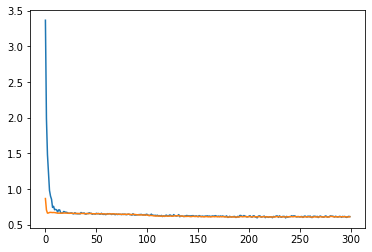

In [98]:
model_1_loss = pd.DataFrame(model_1.history.history)
plt.plot(model_1_loss)

In [104]:
model_1_pred = model_1.predict(X1_test)

In [106]:
model_1_pred

array([[0.6624169 ],
       [0.5183692 ],
       [0.5376267 ],
       [0.72581476],
       [0.6896032 ],
       [0.8379988 ],
       [0.940603  ],
       [0.69315803],
       [0.64448905],
       [0.5376267 ],
       [0.49155563],
       [0.5376267 ],
       [0.64508194],
       [0.82535255],
       [0.50201046],
       [0.5209971 ],
       [0.72119653],
       [0.5622216 ],
       [0.6987802 ],
       [0.63023406],
       [0.5376267 ],
       [0.73507416],
       [0.5376267 ],
       [0.5376267 ],
       [0.5219837 ],
       [0.6172884 ],
       [0.43678096],
       [0.73801035],
       [0.5376267 ],
       [0.48635507],
       [0.6645023 ],
       [0.5376267 ],
       [0.7718127 ],
       [0.49757972],
       [0.48574388],
       [0.632755  ],
       [0.9382374 ],
       [0.5452094 ],
       [0.69290495],
       [0.87086654],
       [0.70404905],
       [0.6465945 ],
       [0.47075292],
       [0.5376267 ],
       [0.6549774 ],
       [0.85157466],
       [0.81040096],
       [0.906

In [107]:
for i in range(len(model_1_pred)):
    if model_1_pred[i]>=0.5:
        model_1_pred[i]=1
    else:
        model_1_pred[i]=0

In [108]:
model_1_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [109]:
print(confusion_matrix(Y1_test, model_1_pred))

[[ 19 110]
 [ 13 191]]


### Now lets create a new dataset by ignoring the low correlation values

In [120]:
X_1 = df_2.drop(['name','target_5yrs', '3p_made', '3pa', '3p'], axis=1)

In [126]:
Y_1 = df_2['target_5yrs']

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=73)

In [129]:
Y2_train, Y2_test

(1003    1.0
 299     0.0
 1118    0.0
 770     0.0
 80      1.0
        ... 
 321     1.0
 323     1.0
 400     1.0
 146     0.0
 929     1.0
 Name: target_5yrs, Length: 1063, dtype: float64,
 1242    1.0
 1088    1.0
 329     1.0
 861     1.0
 346     1.0
        ... 
 1052    0.0
 295     0.0
 1243    0.0
 1026    1.0
 905     1.0
 Name: target_5yrs, Length: 266, dtype: float64)

In [132]:
log_reg_new = LogisticRegression(max_iter=200)

In [133]:
log_reg_new.fit(X2_train, Y2_train)

C:\Users\rutwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [134]:
log_reg_new_pred=log_reg_new.predict(X2_test)

In [135]:
print(classification_report(log_reg_new_pred, Y2_test))

              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58        76
         1.0       0.85      0.74      0.79       190

    accuracy                           0.72       266
   macro avg       0.68      0.71      0.69       266
weighted avg       0.76      0.72      0.73       266



In [136]:
print(confusion_matrix(log_reg_new_pred, Y2_test))

[[ 52  24]
 [ 50 140]]


### Ok Some good improvement  
Maybe some PCA will do the trick

In [160]:
from sklearn.decomposition import PCA

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler = StandardScaler()

In [163]:
scaler.fit(X_1)

StandardScaler()

In [164]:
scaled_X1 = scaler.transform(X_1)

In [165]:
scaled_X1 = pd.DataFrame(scaled_X1, columns=X_1.columns)

In [166]:
scaled_X1

gp       min       pts       fgm       fga        fg       ftm  \
0    -1.396466  1.171517  0.132867 -0.020616  0.471865 -1.539520  0.300531   
1    -1.453692  1.111452  0.087038 -0.376442  0.221689 -2.373236  1.311686   
2     0.778130 -0.282057 -0.371255 -0.376442 -0.334258 -0.313466 -0.407277   
3    -0.137489 -0.726539 -0.256682 -0.198529 -0.111880 -0.248077 -0.407277   
4    -0.709751 -0.738552 -0.531657 -0.613660 -0.806813  1.353966 -0.002815   
...        ...       ...       ...       ...       ...       ...       ...   
1324  1.121487 -0.221992 -0.577486 -0.613660 -0.640029 -0.133645 -0.103931   
1325  0.434773 -0.606408 -0.669145 -0.672965 -0.501042 -1.359698 -0.508392   
1326 -0.995882 -0.666474 -0.325425 -0.257834 -0.556637  1.778998 -0.306162   
1327 -0.480846 -0.678487 -0.531657 -0.554356 -0.584434 -0.035561 -0.103931   
1328 -0.766977 -0.714526 -0.554572 -0.613660 -0.417650 -1.179877 -0.609508   

           fta        ft      oreb      dreb       reb       ast       stl  \
0     0.356433 -0.048365 -0.394923  1.012191  0.519775  0.231411 -0.537044   
1     1.185898  0.581052 -0.651701 -0.015746 -0.304835  1.452906  1.168699   
2    -0.397626 -0.324927 -0.651701 -0.236018 -0.401848 -0.379336 -0.293367   
3    -0.397626 -0.143731 -0.009757 -0.823410 -0.547367 -0.515058 -0.049689   
4     0.054810 -0.286780 -0.009757 -0.382866 -0.256329 -0.854362 -0.780722   
...        ...       ...       ...       ...       ...       ...       ...   
1324 -0.246814  0.838541 -0.780089 -0.896834 -0.886913  0.638576 -0.049689   
1325 -0.623843  0.857614 -0.780089 -0.676562 -0.741393  0.502854  0.437666   
1326 -0.171408 -0.582416  0.632186  0.204527  0.374255 -0.854362 -0.780722   
1327 -0.020596 -0.754075 -1.036867 -1.190530 -1.129445  0.434994 -0.537044   
1328 -0.623843 -0.296317 -1.036867 -0.970258 -1.032432 -0.107893  0.193989   

           blk       tov  
0     0.079043  0.143591  
1     0.312485  0.557843  
2    -0.154398 -0.270661  
3    -0.621281 -0.270661  
4     0.079043 -0.546829  
...        ...       ...  
1324 -0.387839 -0.546829  
1325 -0.854722  0.143591  
1326  0.079043 -0.408745  
1327 -0.621281 -0.546829  
1328 -0.621281 -0.408745  

[1329 rows x 16 columns]

In [167]:
#X3_train, X3_test, Y3_train, Y3_test = train_test_split(scaled_X1, Y_1, test_size=0.2, random_state=73)

In [168]:
pca=PCA(n_components='mle')

In [169]:
pca.fit(scaled_X1)

PCA(n_components='mle')

In [170]:
X_pca = pca.transform(scaled_X1)

In [171]:
pca.components_

array([[ 2.03054452e-01,  3.05626906e-01,  3.11629298e-01,
         3.09060353e-01,  2.99453544e-01,  1.12461001e-01,
         2.93993528e-01,  2.96077499e-01,  5.91272811e-02,
         2.32601842e-01,  2.68916730e-01,  2.65867874e-01,
         1.78967301e-01,  2.32931870e-01,  1.70799006e-01,
         2.83294093e-01],
       [-2.79953261e-02, -9.49816475e-02, -8.78120057e-02,
        -6.52912396e-02, -1.44558327e-01,  3.42433042e-01,
        -4.78106589e-02,  2.01273040e-02, -3.25449965e-01,
         3.68107833e-01,  2.65353848e-01,  3.14629698e-01,
        -4.19731868e-01, -2.62127643e-01,  3.79589740e-01,
        -1.93836807e-01],
       [-3.25088820e-01,  2.98530352e-02, -3.31170640e-02,
        -2.21526655e-02,  1.73807525e-02, -2.47284599e-01,
        -6.25488944e-02,  4.21598213e-02, -8.22859732e-01,
        -3.54091070e-03,  1.70593490e-03,  2.86936231e-04,
         2.35523699e-01,  2.44640898e-01,  9.08555729e-03,
         1.79388399e-01],
       [-5.69410324e-01, -1.14698909e

In [172]:
len(pca.components_)

15

In [173]:
X_pca

array([[ 5.57740160e-01, -3.36782560e-01,  8.62803578e-01, ...,
         7.88352612e-02,  1.58001565e-01, -4.48711549e-02],
       [ 1.03266973e+00, -2.36628214e+00,  1.32497017e+00, ...,
         3.30526056e-02,  1.32422682e-01, -1.73103874e-02],
       [-1.11342859e+00, -7.86019177e-02, -1.02240432e-01, ...,
        -1.36870292e-02, -1.31535315e-02, -5.02148899e-03],
       ...,
       [-8.64325793e-01,  2.10420481e+00, -1.04688090e-01, ...,
        -2.56105156e-03,  1.97454887e-02,  2.97574804e-02],
       [-2.07214694e+00, -7.41528636e-01,  6.59361640e-01, ...,
         5.69526098e-02,  6.31930999e-03, -5.29529944e-02],
       [-2.34838873e+00, -1.17866948e+00,  7.44919042e-01, ...,
        -1.48416945e-03, -4.10178217e-03,  3.15362623e-02]])

In [174]:
X_pca_components = pd.DataFrame(pca.components_, columns=X_1.columns)

In [175]:
X_pca_components

gp       min       pts       fgm       fga        fg       ftm  \
0   0.203054  0.305627  0.311629  0.309060  0.299454  0.112461  0.293994   
1  -0.027995 -0.094982 -0.087812 -0.065291 -0.144558  0.342433 -0.047811   
2  -0.325089  0.029853 -0.033117 -0.022153  0.017381 -0.247285 -0.062549   
3  -0.569410 -0.011470  0.107454  0.063643  0.142103 -0.593539  0.195409   
4   0.419671  0.149366 -0.184125 -0.168685 -0.081240 -0.556607 -0.290205   
5  -0.582628  0.100525 -0.105665 -0.080070 -0.126501  0.330304 -0.191272   
6   0.067002 -0.163717 -0.070944 -0.140753 -0.164309  0.057645  0.237685   
7  -0.041323  0.192228  0.267541  0.387744  0.413518  0.108204 -0.368377   
8   0.046734  0.023744  0.063487  0.050287  0.068842 -0.055782  0.075301   
9   0.009115  0.309265  0.006174 -0.129516 -0.103989  0.063364  0.202412   
10 -0.001987 -0.215809 -0.046116 -0.014916 -0.027025  0.044015 -0.121478   
11  0.062960 -0.805351  0.133282  0.249759  0.141212 -0.044695  0.002227   
12 -0.006348  0.026071 -0.106347  0.110296 -0.005992 -0.009634 -0.675668   
13 -0.001491 -0.057958 -0.402568 -0.452746  0.781943  0.106472  0.044790   
14  0.004555 -0.070443  0.750670 -0.625754  0.025349  0.014846 -0.190341   

         fta        ft      oreb      dreb       reb       ast       stl  \
0   0.296077  0.059127  0.232602  0.268917  0.265868  0.178967  0.232932   
1   0.020127 -0.325450  0.368108  0.265354  0.314630 -0.419732 -0.262128   
2   0.042160 -0.822860 -0.003541  0.001706  0.000287  0.235524  0.244641   
3   0.156269  0.241557  0.045595  0.098324  0.081916 -0.256664 -0.238688   
4  -0.291103  0.092440  0.063707  0.262832  0.196130  0.103901  0.150643   
5  -0.230454  0.333090  0.037295  0.167881  0.124396  0.289000  0.379881   
6   0.233385  0.029669 -0.309594 -0.201356 -0.250796  0.152692 -0.031144   
7  -0.374515 -0.111632 -0.306003 -0.061868 -0.157557 -0.091499 -0.201505   
8   0.063460 -0.016158  0.060160 -0.264305 -0.151031 -0.482019  0.701420   
9   0.172336 -0.107275 -0.635730  0.465977  0.068962 -0.035594  0.006129   
10 -0.079897  0.049406 -0.317607  0.270049  0.057622 -0.503760  0.204614   
11 -0.005009  0.000037 -0.111705  0.261097  0.134959  0.237991  0.133026   
12  0.712885  0.089399 -0.030890 -0.009992 -0.006449  0.012926 -0.003102   
13  0.060434  0.009824 -0.001700  0.020802  0.011901  0.010315 -0.000695   
14  0.033270  0.001865  0.037412 -0.001919  0.005414  0.012164  0.005666   

         blk       tov  
0   0.170799  0.283294  
1   0.379590 -0.193837  
2   0.009086  0.179388  
3   0.153883 -0.040267  
4   0.313097 -0.046566  
5   0.183075 -0.026858  
6   0.739105  0.178459  
7   0.301419 -0.078528  
8   0.113937 -0.373206  
9  -0.114477 -0.387298  
10 -0.090119  0.666289  
11  0.003419 -0.268557  
12 -0.005699 -0.040568  
13  0.005486 -0.018925  
14  0.004154  0.010503

<AxesSubplot:>

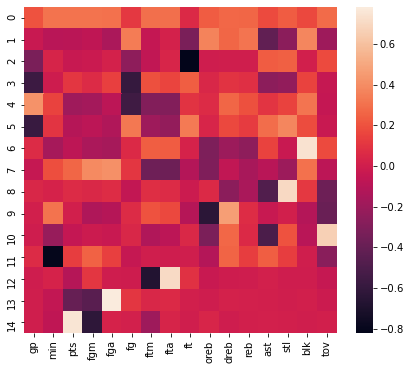

In [176]:
plt.figure(figsize=(7,6))
sns.heatmap(X_pca_components)

In [177]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X_pca, Y_1, test_size=0.2, random_state=73)

In [178]:
pca_log_reg_model = LogisticRegression()

In [179]:
pca_log_reg_model.fit(X3_train, Y3_train)

LogisticRegression()

In [180]:
pca_log_reg_pred = pca_log_reg_model.predict(X3_test)

In [181]:
print(confusion_matrix(pca_log_reg_pred, Y3_test))

[[ 52  25]
 [ 50 139]]


In [182]:
print(classification_report(pca_log_reg_pred, Y3_test))

              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58        77
         1.0       0.85      0.74      0.79       189

    accuracy                           0.72       266
   macro avg       0.68      0.71      0.68       266
weighted avg       0.75      0.72      0.73       266

